In [ ]:
!apt install default-jdk
!pip install konlpy
import os

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import re


from konlpy.tag import Okt
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
def draw_box_plot(df, header):
    print(df.describe(percentiles=None))
    label_list = [row['label'] for i, row in df.iterrows()]
    pred_list = [row['pred'] for i, row in df.iterrows()]
    diff_list = [abs(row['pred'] - row['label']) for i, row in df.iterrows()]
    plt.boxplot([label_list, pred_list, diff_list])
    plt.xticks([1, 2, 3], ['label', 'pred', 'diff'])
    plt.title(f"Boxplot for target label. {header}")
    plt.show()
    
def matching_plot(df):
    # Matching Plot
    _x = np.arange(len(df['label']))
    index = df['label'].sort_values().index
    plt.figure(figsize=(20,8))
    plt.plot(_x, df['pred'][index], 'rx', label='prediction')
    plt.plot(_x, df['label'][index], 'g+', label='label')
    #plt.plot(_x, abs(df['pred'][index]- df['label'][index]), 'yx', label='differ')
    plt.legend()
    plt.show()
    
def diff_depend_plot(df):
    _x = df['diff']# np.arange(len(df['label']))
    plt.figure(figsize=(20,8))
    
    plt.plot(_x, df['pred'], 'rx', label='prediction')
    plt.plot(_x, df['label'], 'g+', label='label')
    plt.plot(_x, df['diff'], 'y*', label='diff')    
    plt.legend()
    plt.show()

EASY_Q = 0.25
HARD_Q = 0.75
OUT_Q = 0.95
def draw_sample_box_plot(df_list, header=None):
    for df in df_list:
        df.describe()
    for col in df_list[0].columns:
        try:
            boxplot_list = []
            for i, df in enumerate(df_list):
                boxplot_list.append([row[col] for i, row in df.iterrows()])
            plt.boxplot(boxplot_list)
            HEADER = [f'~{EASY_Q}', f'{EASY_Q}~{HARD_Q}', f'{HARD_Q}~{OUT_Q}', f'{OUT_Q}~']
            plt.xticks(list(range(1, len(df_list) + 1)), HEADER)
            plt.title(f'{col} on {header}')
            plt.xlabel('diff percentile')
            plt.ylabel('Value')
            plt.ylim(bottom=0)
            plt.show()
        except:
            pass
    


def easy_sample_plot(df, header):
    #df['pad_diff'] = abs(df['s1_pad'] - df['s2_pad'])
    df['len_diff'] = abs(df['s1_len'] - df['s2_len'])
    df['white_diff'] = abs(df['s1_white'] - df['s2_white'])
    easy_th = df['diff'].quantile(EASY_Q)
    hard_th = df['diff'].quantile(HARD_Q)
    out_th = df['diff'].quantile(OUT_Q)
    
    easy_index = df['diff'] < easy_th
    easy_df = df.loc[easy_index, :]
    #draw_box_plot(df.loc[index, :], "easy")
    
    mid_index = (easy_th < df['diff']) & (df['diff'] < hard_th)
    mid_df = df.loc[mid_index, :]
    #draw_box_plot(df.loc[index, :], "middle")

    hard_index = (hard_th < df['diff']) & (df['diff'] < out_th)
    hard_df = df.loc[hard_index, :]   
    #draw_box_plot(df.loc[index, :], "hard")

    out_index = (out_th < df['diff']) 
    out_df = df.loc[out_index, :]   
    #draw_box_plot(df.loc[index, :], "out")    
    draw_sample_box_plot([easy_df, mid_df, hard_df, out_df], header)

stop_words = pd.read_csv('stopwords.csv')
stop_words = set(stop_words['word'])

def show_match(df, header):
    _x = np.arange(len(df['label']))
    diff = abs(df['pred']- df['label'])
    index = diff.sort_values().index
    
    
    okt = Okt()
    after_s1 = [] 
    after_s1_white = []   
    after_s1_stop = []
    for s in df['s1'][index]: 
        s = re.sub('\[PAD\]', "", s).strip()
        after_s1.append(s)
        after_s1_white.append(s.count(' '))
        sw_list = [word for word in okt.morphs(s) if word in stop_words]
        after_s1_stop.append(len(sw_list))
        
        
    after_s2 = [] 
    after_s2_white = []
    after_s2_stop = []
    for s in df['s2'][index]: 
        s = re.sub('\[PAD\]', "", s).strip()
        after_s2.append(s)
        after_s2_white.append(s.count(' '))
        sw_list = [word for word in okt.morphs(s) if word in stop_words]
        after_s2_stop.append(len(sw_list))
        
    after_s1_len = [len(s) for s in after_s1]
    after_s2_len = [len(s) for s in after_s2]
    show = pd.DataFrame({#'idx':index, 
                        'diff':diff[index].round(2),
                        'label': df['label'][index].round(2),
                        'pred': df['pred'][index].round(2),
                        's1_len': after_s1_len,
                        's2_len': after_s2_len,           
                        's1_white': after_s1_white,
                        's2_white': after_s2_white,
                        's1_stop':after_s1_stop,
                        's2_stop':after_s2_stop,
                        's1': after_s1,
                        's2': after_s2,
                        })
    easy_sample_plot(show, header)

MSE train


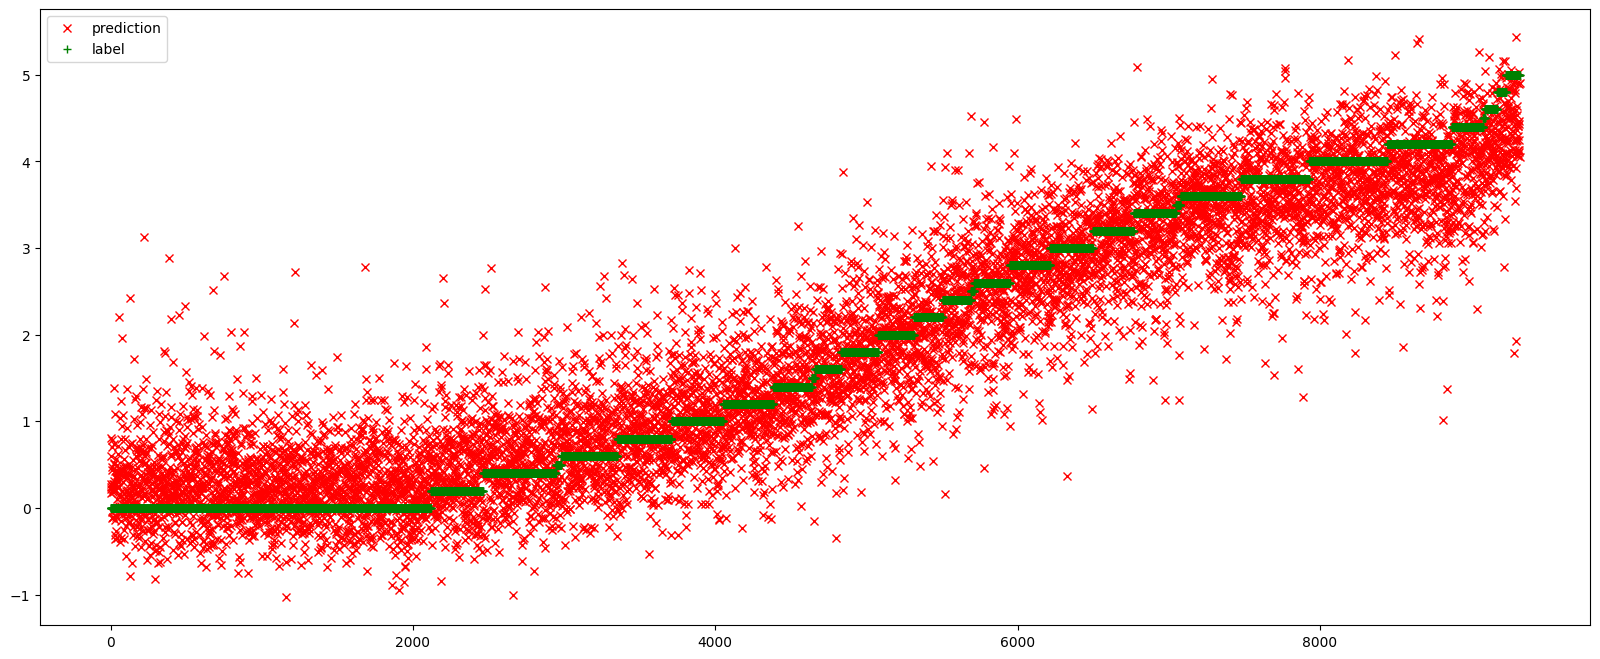

In [215]:
print("MSE train")
data = pd.read_csv(f'../EDA MSE/output/train_49.csv')
data.describe()
matching_plot(data)
show_match(data, "MSE train")

print("MSE val")
data = pd.read_csv(f'../EDA MSE/output/val_49.csv')
data.describe()
matching_plot(data)
show_match(data, "MSE val")


In [ ]:
print("MAE train")
data = pd.read_csv(f'output/train_49.csv')
matching_plot(data)
show_match(data, "MAE train")

print("MAE val")
data = pd.read_csv(f'output/val_49.csv')
matching_plot(data)
show_match(data, "MAE val")

In [ ]:

epoch = len(os.listdir('output'))
for e in range(epoch):
    if e ==49 or e % 5 == 0:
        data = pd.read_csv(f'../EDA MSE/output/train_{e}.csv')
        draw_box_plot(data, f'epoch = {e}')
        matching_plot(data)

    